In [ ]:
"""
Created on 30/12/2024

@author: federica montana

This file is used to load and analyze the indicators created in 2_indicators_creation.ipynb. In particular, it is used to:
- analyze the indicators in Urban Design domain. Do the correlation beterrn the permeability indicator and an external green dataset
- load and analyze the Sustainable transportation domain
- load and analyze the Environmental quality domain
- load and analyze the Green Spaces Accessibility domain

"""
# Import packages
import pandas as pd
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from libpysal import weights

from utility import clusters, indicators, domains, statistics


## Urban Design Domain

In [2]:
# Urban Design Domain - Grid Level
dfs = []
# Exclude Compactness indicator whic is not available at grid level
indicator_city = [indicators[0]] + indicators[1:4]
domain = domains[0]

for indicator in indicator_city:
    for cluster in clusters:
        folder_path = f'DATA\\new_data\\{cluster}\\city'
        filename = f'{domain}_{indicator}.csv'
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['indicator'] = indicator
        df['domain'] = domain
        dfs.append(df)
        #print(f'{cluster} and {indicator}:{len(df.urau_code.unique())}')
            
df_ud_city = pd.concat(dfs, ignore_index=True)
df_ud_city = df_ud_city.drop_duplicates(subset=['gid', 'indicator', 'domain'])

In [3]:
# Urban Design Domain - City Level
dfs = []
indicator_city = indicators[0:4]
domain = domains[0]

for indicator in indicator_city:
    for cluster in clusters:
        folder_path = f'DATA\\new_data\\{cluster}\\city'
        filename = f'{domain}_{indicator}.csv'
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['indicator'] = indicator
        df['domain'] = domain
        dfs.append(df)
        #print(f'{cluster} and {indicator}:{len(df.urau_code.unique())}')
            
df_ud_city = pd.concat(dfs, ignore_index=True)

In [4]:
# Read results - City Level
df = df_ud_city
val = 'val_city'
df_ud = df[df['indicator'] == indicators[3]]
# Select the indicator
indicator = df_ud['indicator'].unique()[0]
# Calculate statistics
d = statistics(df_ud, val, indicator)
d

,Variable,Cluster,Mean,Std,25%,75%,Max,Min
0,Permeability,Large metropolitan,17.39,6.49,13.80,21.00,28.20,4.37
1,Permeability,Medium,30.35,11.24,23.96,36.15,83.06,7.01
2,Permeability,Metropolitan,25.37,9.08,18.48,32.01,45.10,9.23
3,Permeability,Small,36.06,12.77,26.84,42.79,84.70,7.73
4,Permeability,Small towns,32.66,14.54,23.26,40.59,65.46,6.53


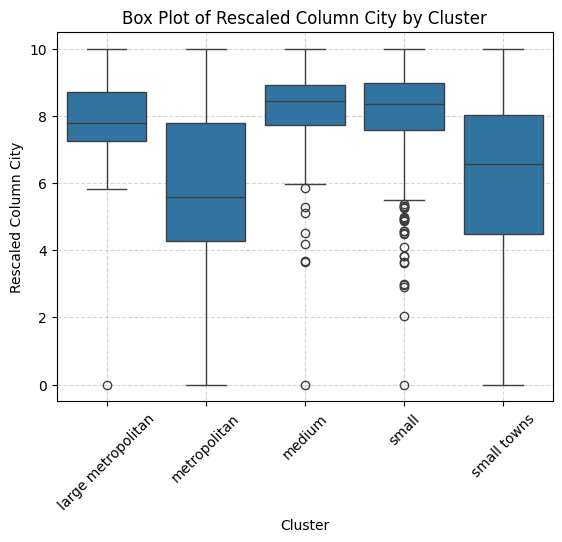

In [5]:
d = df_ud_city[df_ud_city.indicator=='Mid-rise development']
sns.boxplot(data=d, x='cluster', y='rescaled_city')
plt.title('Box Plot of Rescaled Column City by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rescaled Column City')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

In [8]:
## Correlation with green dataframe
#  Green Domain - Grid Level
df_green = pd.read_csv('DATA\\external_dataset\df_green.csv')
# Permeability indicator - Grid Level
df_imd2 = pd.read_csv('DATA\\data\df_imd.csv')
# Merge the two dataframes
merged_df = pd.merge(df_imd2[['gid','urau_code','val_grid']], df_green, on=['gid','urau_code'], how='inner')
# Spearman correlation and p-value 
spearman_corr, spearman_p = stats.spearmanr(merged_df['val_grid'], merged_df['percGS300'])


In [9]:
# Option 2: Segmented violin plot
# First, create categories for permeability
merged_df['perm_cat'] = pd.qcut(merged_df['val_grid'], q=5, labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

plt.figure(figsize=(12, 8))
sns.violinplot(data=merged_df, x='perm_cat', y='percGS300')
plt.title('Green Space Distribution by Permeability Categories')
plt.xlabel('Permeability Percentile')
plt.ylabel('Green Space Percentage')
plt.xticks(rotation=45)
plt.savefig('plots\indicators\\permvsgreen.png', bbox_inches='tight', dpi=300)
plt.close()


## Sustainable Transportation domain

In [7]:
# Sustainable Transportation Domain 
dfs = []
indicator =  indicators[4:7] # Select the indicators
domain = domains[1]
scale = 'grid'

for indicator in indicator:
    for cluster in clusters:
        folder_path = f'DATA\\new_data\\{cluster}\\{scale}'
        filename = f'{domain}_{indicator}.csv'
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['indicator'] = indicator
        df['domain'] = domain
        dfs.append(df)
        #print(f'{cluster} and {indicator}:{len(df.urau_code.unique())}')
if scale == 'grid':
    df_st_grid = pd.concat(dfs, ignore_index=True)
else:
    df_st_city = pd.concat(dfs, ignore_index=True)            


In [22]:
df = df_st_city[df_st_city.indicator==indicators[5]]
statistics(df,'rescaled_city','walk')

,Variable,Cluster,Mean,Std,25%,75%,Max,Min
0,walk,Large metropolitan,1.62,0.67,1.14,2.14,2.61,0.58
1,walk,Medium,1.79,0.91,1.22,2.11,5.53,0.00
2,walk,Metropolitan,1.79,1.01,1.16,2.03,4.38,0.31
3,walk,Small,1.68,0.99,1.01,2.19,5.54,0.00
4,walk,Small towns,1.27,0.96,0.40,2.09,3.12,0.00


In [17]:
df = df_st_grid[df_st_grid.indicator==indicators[5]]
statistics(df,'val_grid','walk')

,Variable,Cluster,Mean,Std,25%,75%,Max,Min
0,walk,Large metropolitan,2.54,7.71,0.0,0.0,100.0,0.0
1,walk,Medium,3.83,10.53,0.0,0.0,100.0,0.0
2,walk,Metropolitan,3.93,9.92,0.0,0.0,100.0,0.0
3,walk,Small,3.68,10.51,0.0,0.0,100.0,0.0
4,walk,Small towns,2.61,8.17,0.0,0.0,100.0,0.0


In [8]:
df = df_st_city[df_st_city.indicator==indicators[5]]
df[df.val_city == df.val_city.max()]

,gid,urau_code,urau_name,pop_final,val_city,rescaled_city,cluster,indicator,domain
1394,2842404,FI007C2,Lahti,1.331721,30.645218,8.755777,small,Opportunity to cycle,Sustainable Transportation


In [73]:
# At city level 
df = df_st_city[df_st_city['indicator'] == indicators[4]]
# Print top 5 cities with highest values
df = df.sort_values(by='val_city', ascending=False)
df.head(5)

,gid,urau_code,urau_name,pop_final,val_city,rescaled_city,cluster,indicator,domain
261,654510,CH002C1,Geneve,337.099463,69.021946,9.860278,small,Opportunity to walk,Sustainable Transportation
439,1203532,ES516C1,Salamanca,91.949045,66.450026,9.492861,small,Opportunity to walk,Sustainable Transportation
400,1289597,ES038C1,Coslada,725.056914,65.282938,9.326134,small,Opportunity to walk,Sustainable Transportation
438,1201842,ES515C1,Burgos,35.709532,65.214502,9.316357,small,Opportunity to walk,Sustainable Transportation
53,2179077,PL004C1,Wroclaw,13.386856,64.695157,9.242165,metropolitan,Opportunity to walk,Sustainable Transportation


Compare with MODE SHARE

In [3]:
# Compare cycling infrastructure in cities with Mueller et al. data
from utility import new_name
df2 = pd.read_csv('DATA\\external_dataset\\merged_share_cycleway.csv')
df2 = df2.rename(columns = {'city':'urau_name'})
df2 = new_name(df2)
df1 = df_st_city[df_st_city['indicator'] == indicators[5]]
df = pd.merge(df1[['val_city','rescaled_city','urau_name','urau_code']],df2[['urau_name','Bike','cycleway','Walk']],on=['urau_name'], how = 'inner')

plt.figure(figsize=(10, 6))
plt.grid(True, alpha=0.3)

# Scatter plot
plt.scatter(df['val_city'], df['Bike'])

# City labels
for i, txt in enumerate(df['urau_name']):
    plt.annotate(txt, (df['val_city'][i], df['Bike'][i]))

# Trend line
z = np.polyfit(df['val_city'], df['Bike'], 2)
x_trend = np.linspace(df['val_city'].min(), df['val_city'].max(), 100)
plt.plot(x_trend, np.poly1d(z)(x_trend), 'r-', alpha=0.8)

plt.xlabel('Opportunity to cycle')
plt.ylabel('cycling mode share (%)')
plt.tight_layout()
plt.savefig('plots\\indicators\\cycl_modeshare_rescaled_score.png')
plt.close()

In [75]:
df = df_st_city[df_st_city['indicator'] == indicators[6]]
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='cluster', y='val_city')
plt.title('Public Transport Stops by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of transport stops')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('plots\\indicators\\public_transport_stops.png')
plt.close()

### Environmental Quality domain

In [135]:
# Environmental Quality Domain 
dfs = []
indicator =  indicators[7:11] # Select the indicators
domain = domains[2]
scale = 'city'

for indicator in indicator:
    for cluster in clusters:
        folder_path = f'DATA\\new_data\\{cluster}\\{scale}'
        filename = f'{domain}_{indicator}.csv'
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['indicator'] = indicator
        df['domain'] = domain
        dfs.append(df)
        #print(f'{cluster} and {indicator}:{len(df.urau_code.unique())}')
if scale == 'grid':
    df_st_grid = pd.concat(dfs, ignore_index=True)
else:
    df_st_city = pd.concat(dfs, ignore_index=True)            

In [143]:
df = df_st_city[df_st_city['indicator'] == indicators[10]]
d = statistics(df,'val_city','uhi')
d

,Variable,Cluster,Mean,Std,25%,75%,Max,Min
0,uhi,Large metropolitan,0.29,0.40,0.20,0.41,0.93,-0.67
1,uhi,Medium,0.41,0.37,0.22,0.58,1.98,-0.64
2,uhi,Metropolitan,0.53,0.45,0.31,0.65,2.23,-0.71
3,uhi,Small,0.46,0.58,0.22,0.65,5.88,-1.76
4,uhi,Small towns,0.41,0.50,0.17,0.49,2.98,-0.17


## Green Spaces Accessibility

### Universal access to green spaces 

In [9]:
# Read results -- City
dfs = []
indicator =  indicators[11:13] # Select the indicators
domain = domains[3]
scale = 'city'

for indicator in indicator:
    for cluster in clusters:
        folder_path = f'DATA\\new_data\\{cluster}\\{scale}'
        filename = f'{domain}_{indicator}.csv'
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['indicator'] = indicator
        df['domain'] = domain
        dfs.append(df)
        #print(f'{cluster} and {indicator}:{len(df.urau_code.unique())}')
if scale == 'grid':
    df_st_grid = pd.concat(dfs, ignore_index=True)
else:
    df_st_city = pd.concat(dfs, ignore_index=True)            


In [13]:
df = df_st_city[df_st_city.indicator == indicators[12]]
d = statistics(df,'val_city','green2km')
d

,Variable,Cluster,Mean,Std,25%,75%,Max,Min
0,green2km,Large metropolitan,63.57,8.24,58.34,68.47,78.68,50.30
1,green2km,Medium,57.95,11.79,51.93,66.30,83.06,19.52
2,green2km,Metropolitan,59.76,10.86,52.72,66.65,84.64,36.10
3,green2km,Small,56.26,16.05,49.44,66.38,93.91,0.00
4,green2km,Small towns,59.21,14.71,51.17,68.50,88.55,32.28


## Green Spaces Accessibility

In [73]:
dfs = []
df = pd.DataFrame()
domain = 'Green Spaces Accessibility'
indicators = ['Universal access to green spaces', 'Access to Large Green Spaces']
for indicator in indicators:
    for cluster in clusters:
        folder_path = f'{cluster}\\new_data\\city'
        filename = f'{domain}_{indicator}.csv'
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        df['indicator'] = indicator
        df['domain'] = domain
        df['cluster_type'] = cluster
        dfs.append(df)
    # print(f'{cluster} and {indicator}:{len(df.urau_code.unique())}')
            
combined_df = pd.concat(dfs, ignore_index=True)